<a href="https://colab.research.google.com/github/JaniceLibbyThomas/Colab_Backup/blob/main/Linear%20regression_Kousik%20class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Simple Linear Regresion**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv('student_scores.csv') #read the dataset

In [ ]:
print(dataset.shape)
dataset.head()

(25, 2)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
dataset.Hours.quantile(0.25)

2.7

In [ ]:
iqr = dataset.Hours.quantile(0.75) - dataset.Hours.quantile(0.25)
iqr
upper_threshold = dataset.Hours.quantile(0.75) + (1.5 * iqr) # q3 + 1.5iqr
lower_threshold = dataset.Hours.quantile(0.25) - (1.5 * iqr) # q1 - 1.5iqr
upper_threshold

14.450000000000001

values greater than q3 + 1.5iqr -> outlier
values less than q1 - 1.5iqr -> outlier




No skew in the data. 

In [ ]:
dataset.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [ ]:
dataset = dataset.drop_duplicates() # code to delete duplicates
dataset.shape


(25, 2)

In [ ]:
dataset.dtypes

Hours     float64
Scores      int64
dtype: object

Median and mean are closer to each other - there is less skew in the data

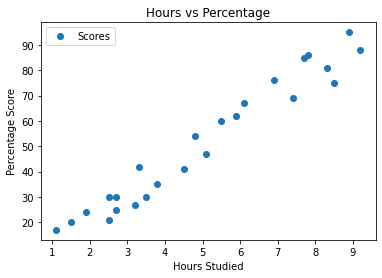

In [ ]:
dataset.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

1) Is there any relationship between the feature and target - Yes
2) Is there any linear relationship between the feature and target - Yes
3) No transformation is required

In [ ]:
dataset.corr() # correlation

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


There is a linear relationship between hours and score => we can go ahead and develop a linear regression model. No transformation required.



In [ ]:
dataset.Scores.values

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

# Preparing the data

In [ ]:
a = [1,2,3,4]
a[:-2]

[1, 2]

In [ ]:
#dataset.iloc[row_criteria,column_criteria]

In [ ]:
X = dataset.loc[:, ['Hours']].values # select all rows and select all columns except the last column as my feature
y = dataset.loc[:, 'Scores'].values # target as arrays
# Syntax : dataset.loc[:, :-1]
from sklearn.model_selection import train_test_split #import the required function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 7)

In [ ]:
y_test

array([47, 20, 62, 42, 27, 54, 25])

In [ ]:
X_train.shape, X_test.shape

((18, 1), (7, 1))

# Normlising/Scaling the data

In [ ]:
# from sklearn.preprocessing import StandardScaler # importing the required function
# scaler = StandardScaler() #initialis
# scaler.fit(X_train) # find the values of mu and sigma
# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test) #only transform the test dataset, dont fit it

In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# shivaData = np.array([1.4,2.3,3.3,4,-4]).reshape(-1,1)
# scaler = MinMaxScaler()
# scaler.fit(shivaData)
# scaler.transform(shivaData)

In [ ]:
# scaler.var_

In [ ]:
X_test

array([[5.1],
       [1.5],
       [5.9],
       [3.3],
       [3.2],
       [4.8],
       [2.7]])

# Modelling

In [ ]:
#Model for algorithm - score = (m * hours) + c

In [ ]:
# 

In [ ]:
from sklearn.linear_model import LinearRegression #importing all the required functions
regressor = LinearRegression() # spredicted score = m * hours + c  
"Symtax : varName = ModelName(modelHyperParams)"
regressor.fit(X_train, y_train) #Learning happens - GD is done and we get the final values of m and c

LinearRegression()

In [ ]:
print(regressor.intercept_) # c

2.39583817924818


In [ ]:
print(regressor.coef_) # slope - m

# predicted score  = 9.78 * (hours) + 2.39

[9.78618333]


In [ ]:
regressor.predict([[5]]) # perils of extrapolations

array([51.32675482])

In [ ]:
#regressor.predict(scaler.transform(np.array([4]).reshape(-1,1)))

In [ ]:
y_pred = regressor.predict(X_test) # given the features of the test dataset, it will give the final predictions
"Syntax : varName.predict(test_features)"
y_pred

array([52.30537315, 17.07511317, 60.13431981, 34.69024316, 33.71162483,
       49.36951815, 28.81853316])

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,47,52.305373
1,20,17.075113
2,62,60.134320
3,42,34.690243
4,27,33.711625
5,54,49.369518
6,25,28.818533


In [ ]:
regressor.predict([[12]]) # perils of extrapolation

array([119.83003811])

In [ ]:
x = input()
x

2


'2'

# Metrics

In [ ]:
from sklearn import metrics # metrics will contain all the evaluation metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))
regressor.score(X_test,y_test) # another way to get the r^2 values

R2- SCORE: 0.8855069248710155


0.8855069248710155

# **Multiple Linear Regression**

In [ ]:
import pandas as pd
dataset = pd.read_csv('petrol_consumption.csv')

In [ ]:
dataset.head()
#dataset.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [ ]:
dataset.shape

(48, 5)

In [ ]:
dataset.isnull().sum()

Petrol_tax                      0
Average_income                  0
Paved_Highways                  0
Population_Driver_licence(%)    0
Petrol_Consumption              0
dtype: int64

In [ ]:
dataset.dtypes

Petrol_tax                      float64
Average_income                    int64
Paved_Highways                    int64
Population_Driver_licence(%)    float64
Petrol_Consumption                int64
dtype: object

In [ ]:
dataset = dataset.drop_duplicates()

In [ ]:
dataset.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [ ]:
iqr = dataset['Petrol_tax'].quantile(0.75) - dataset['Petrol_tax'].quantile(0.25)
upper_threshold = dataset['Petrol_tax'].quantile(0.75) + (1.5 * iqr)
lower_threshold = dataset['Petrol_tax'].quantile(0.25) - (1.5 * iqr)
upper_threshold, lower_threshold
dataset.Petrol_tax = dataset.Petrol_tax.clip(lower_threshold, upper_threshold)

In [ ]:
iqr = dataset['Average_income'].quantile(0.75) - dataset['Average_income'].quantile(0.25)
upper_threshold = dataset['Average_income'].quantile(0.75) + (1.5 * iqr)
lower_threshold = dataset['Average_income'].quantile(0.25) - (1.5 * iqr)
print(upper_threshold, lower_threshold)
dataset.Average_income = dataset.Average_income.clip(lower_threshold, upper_threshold)

5838.375 2479.375


In [ ]:
iqr = dataset['Paved_Highways'].quantile(0.75) - dataset['Paved_Highways'].quantile(0.25)
upper_threshold = dataset['Paved_Highways'].quantile(0.75) + (1.5 * iqr)
lower_threshold = dataset['Paved_Highways'].quantile(0.25) - (1.5 * iqr)
print(upper_threshold, lower_threshold)
dataset.Paved_Highways = dataset.Paved_Highways.clip(lower_threshold, upper_threshold)

13224.625 -2958.375


In [ ]:
iqr = dataset['Population_Driver_licence(%)'].quantile(0.75) - dataset['Population_Driver_licence(%)'].quantile(0.25)
upper_threshold = dataset['Population_Driver_licence(%)'].quantile(0.75) + (1.5 * iqr)
lower_threshold = dataset['Population_Driver_licence(%)'].quantile(0.25) - (1.5 * iqr)
print(upper_threshold, lower_threshold)
dataset['Population_Driver_licence(%)'] = dataset['Population_Driver_licence(%)'].clip(lower_threshold, upper_threshold)

0.6934999999999998 0.4315000000000002


In [ ]:
dataset.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.670937,4241.833333,5450.442708,0.569698,576.770833
std,0.923415,573.623768,3149.104278,0.053823,111.885816
min,5.312500,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,9.812500,5342.000000,13224.625000,0.693500,968.000000


In [ ]:
dataset.shape

(48, 5)

# **EDA**

In [ ]:
dataset.groupby('Petrol_tax')['Petrol_Consumption'].mean()

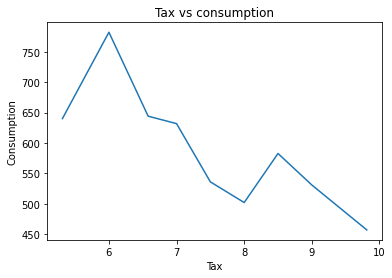

In [ ]:
dataset.groupby('Petrol_tax')['Petrol_Consumption'].mean().plot()
import matplotlib.pyplot as plt
#dataset.plot(x='Petrol_tax', y='Petrol_Consumption', style='o')
plt.title('Tax vs consumption')
plt.xlabel('Tax')
plt.ylabel('Consumption')
plt.show()

In [ ]:
dataset[['Petrol_tax','Petrol_Consumption']].corr()

,Petrol_tax,Petrol_Consumption
Petrol_tax,1.000000,-0.455955
Petrol_Consumption,-0.455955,1.000000


1) There is a linear relationship between tax and consumption
2) As tax increases, comsumption decreases which is in-line with our GK
3) No transformation required - we can consider the feature for linear regression


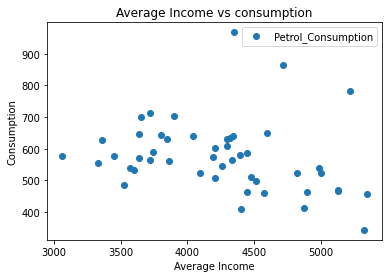

,Average_income,Petrol_Consumption
Average_income,1.000000,-0.244862
Petrol_Consumption,-0.244862,1.000000


In [ ]:
dataset.plot(x='Average_income', y='Petrol_Consumption', style='o')
plt.title('Average Income vs consumption')
plt.xlabel('Average Income')
plt.ylabel('Consumption')
plt.show()
#dataset[['Average_income','Petrol_Consumption']].corr()
dataset[['Average_income','Petrol_Consumption']].corr()

1) There is a low linear relationshp between the data 
2) No transformation reqd
3) The direction of relatiohsnip is not in-line with our GK

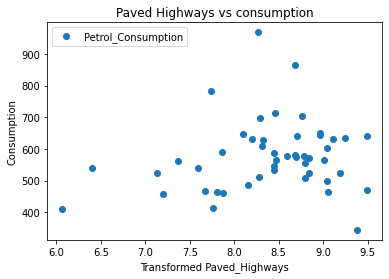

,transformed,Petrol_Consumption
transformed,1.000000,0.165334
Petrol_Consumption,0.165334,1.000000


In [ ]:
import numpy as np
dataset['transformed'] = np.log(dataset['Paved_Highways']) # transformation
dataset.plot(x='transformed', y='Petrol_Consumption', style='o')
plt.title('Paved Highways vs consumption')
plt.xlabel('Transformed Paved_Highways')
plt.ylabel('Consumption')
plt.show()
dataset[['transformed','Petrol_Consumption']].corr()

In [ ]:
del dataset['Paved_Highways']

1) There is no linear relationship between highways and consumption
2) Have tried all trasnformations - still not able to see a good linear relationship
3) Have decided to drop the feature

In [ ]:
#dataset['logPaved_Highways']  = np.log(dataset['Paved_Highways'])

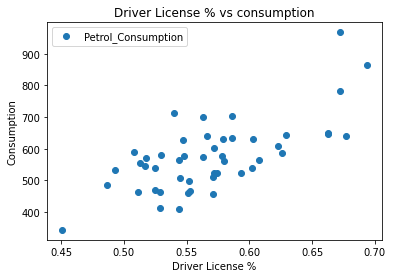

,Population_Driver_licence(%),Petrol_Consumption
Population_Driver_licence(%),1.000000,0.689301
Petrol_Consumption,0.689301,1.000000


In [ ]:

dataset.plot(x='Population_Driver_licence(%)', y='Petrol_Consumption', style='o')
plt.title('Driver License % vs consumption')
plt.xlabel('Driver License %')
plt.ylabel('Consumption')
plt.show()
dataset[['Population_Driver_licence(%)','Petrol_Consumption']].corr()

1) High correlation between the data 
2) No transformation reqd

In [ ]:
X = dataset[['Petrol_tax', 'Average_income', 'Population_Driver_licence(%)']].values #array of features
y = dataset['Petrol_Consumption'].values #array of targets

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.preprocessing import StandardScaler ## standrard scalig 
scaler = StandardScaler() #initialise to a variable
scaler.fit(X_train) # we are finding the values of mean and sd from the td
X_train_scaled = scaler.transform(X_train) # fit (mean, sd) and then transform the training data
X_test_scaled = scaler.transform(X_test) # transform the test data 

# Model training

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
coeff_df = pd.DataFrame(regressor.coef_,['Petrol_tax', 'Average_income',
       'Population_Driver_licence(%)'], columns=['Coefficient'])
y_pred = regressor.predict(X_test_scaled)
coeff_df
# petrol_consumption = -29.04 *scaled_petrol_tax + -39.9 * scaled_avg_income +  80.6* scaled_pop_driver + 579.86

,Coefficient
Petrol_tax,-26.682892
Average_income,-40.351198
Population_Driver_licence(%),80.802043


In [ ]:
regressor.predict(scaler.transform(np.array([[8, 3500, 0.5]])))

array([517.9019617])

In [ ]:
regressor.intercept_ # c 

586.2894736842107

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,580,500.938097
1,487,496.447152
2,628,612.203884
3,410,521.389201
4,460,505.890608
5,566,649.742571
6,699,629.242359
7,464,495.542056
8,648,739.270595
9,464,409.571244


In [ ]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.46503867177654457


# Feature Selection

# RFE

In [ ]:
from sklearn.feature_selection import RFE
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=3, step=1)
selector = selector.fit(X_train_scaled, y_train)
list(zip(['Petrol_tax', 'Average_income', 'LogPaved_Highways',
       'Population_Driver_licence(%)'],selector.support_))

# Sequential Feature selection

In [ ]:
!pip install scikit-learn==0.24.2

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
estimator = LinearRegression()
sfs = SequentialFeatureSelector(estimator, n_features_to_select=2)
sfs.fit(X_train_scaled, y_train)
print(list(zip(['Petrol_tax', 'Average_income', 'LogPaved_Highways',
       'Population_Driver_licence(%)'],sfs.get_support())))

In [ ]:
list(zip([1,2,3],['a','b','c']))

In [ ]:
X_trans = sfs.transform(X)
X_trans # feature selection

# Cross Validation

In [ ]:
from sklearn.model_selection import cross_validate
regressor = LinearRegression(normalize = True) #untrained model

In [ ]:
cv_results = cross_validate(regressor, X, y, cv=10, scoring = "r2")
cv_results['test_score'].mean()


# **Ridge Regression**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import Lasso, Ridge
for alpha in [0.001,0.002,0.003,0.005,0.01,0.02,0.03,0.04,0.1,0.2,0.5,1]:
  regressor = Ridge(normalize=True,alpha = alpha)
  cv_results = cross_validate(regressor, X, y, cv=5, scoring = "r2" , return_train_score=True)
  print("Alpha : ", alpha, cv_results['test_score'].mean(), cv_results['train_score'].mean())

